In [1]:
import math
import numpy

In [2]:
def evencliffordprolatematrix(k,c,m):
    M=numpy.zeros((m,m))
    M[0,0]=(4*(math.pi)**2)*(c**2)*(k+1)/(k+2)
    for i in range(m-1): 
        M[i+1,i]=-(4*(math.pi)**2)*(c**2)*((i+1)*(k+i+1))/((k+2*i+2)*math.sqrt((k+2*i+3)*(k+2*i+1)))
    for i in range(m-1):
        M[i+1,i+1]=4*(i+1)*(k+i+2)+4*((math.pi)**2)*(c**2)*((((i+k+2)**2)/((2*i+k+4)*(2*i+k+3)))+(((i+1)**2)/((2*i+k+2)*(2*i+k+3))))
    for i in range(m-1):
        M[i,i+1]=-(4*(math.pi)**2)*(c**2)*((i+1)*(k+i+1))/((k+2*i+2)*math.sqrt((k+2*i+3)*(k+2*i+1)))
    return M

In [3]:
evencliffordprolatematrix(1,1,4)

array([[26.31894507, -9.30515227,  0.        ,  0.        ],
       [-9.30515227, 33.05515606, -9.6701979 ,  0.        ],
       [ 0.        , -9.6701979 , 52.3031862 , -9.76837501],
       [ 0.        ,  0.        , -9.76837501, 80.05252958]])

In [4]:
import numpy as np
import numpy.linalg as linalg
def evencoefficientcliffordprolate(k,c,m,n):
    A=evencliffordprolatematrix(k,c,m)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::+1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors[:,n]

In [5]:
evencoefficientcliffordprolate(1,1,4,0)

array([-0.76078657, -0.6206282 , -0.18743795, -0.02985699])

In [6]:
from scipy.special import gamma, binom

def evencliffordlegendrewithoutyk(r, N, k):
    if N == 0:
        C = (r**k) / np.sqrt(2 * np.pi)
    else:
        prefactor = ((2**(2*N)) * gamma(2*N + 1)) / gamma(N + 1)
        C = prefactor * ((gamma(k + N + 1) / gamma(k + 1)) * ((r**k) / np.sqrt(2 * np.pi)))
        
        for i in range(1, N + 1):
            C += prefactor * (binom(N, i) * ((gamma(i + k + N + 1) / gamma(i + k + 1))) *
                              (-1)**i * (1 / np.sqrt(2 * np.pi)) * (r**(2*i + k)))
    
    D = (np.sqrt(2*k + 4*N + 2) / (2**(2*N) * gamma(2*N+1))) * C
    return D


In [7]:
evencliffordlegendrewithoutyk(0.5, 4, 3)

0.10115598879240298

In [8]:
def evencomputemultiprolatewithoutyk(r, k, c, m, n):
    G = 0.0
    N = evencoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * evencliffordlegendrewithoutyk(r, j, k)  
    return G


In [9]:
evencomputemultiprolatewithoutyk(0.43, 1, 1, 40, 0)

0.8258854957593746

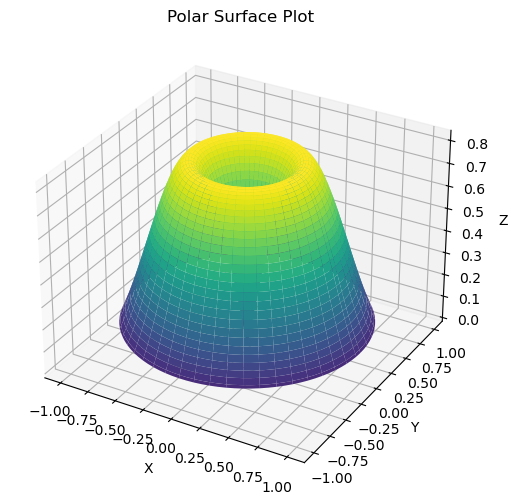

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
k = 1
c = 1
m = 40
n = 0

# Define the polar grid
r = np.linspace(0, 1, 100)  # Radius from 0 to 1
theta = np.linspace(0, 2 * np.pi, 100)  # Angle from 0 to 2π
R, T = np.meshgrid(r, theta)

# Convert polar to Cartesian coordinates
X = R * np.cos(T)
Y = R * np.sin(T)

# Compute function values
Z = evencomputemultiprolatewithoutyk(R, k, c, m, n)

# Create surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Polar Surface Plot")

plt.show()


In [11]:
def oddcliffordprolatematrix(k, c, m):
    M = np.zeros((m, m))
    
    for i in range(m - 1):
        M[i, i + 1] = -(4 * (np.pi)**2) * (c**2) * ((i + 1) * (k + i + 2)) / ((k + 2 * (i + 1) + 1) * np.sqrt((k + 2 * (i + 1) + 2) * (k + 2 * (i + 1))))
    
    for i in range(m):
        M[i, i] = (4 * (i + 1) * (k + i + 1) +
                   4 * (np.pi)**2 * (c**2) * (((i + k + 1)**2) / ((2 * (i + 1) + k - 1) * (2 * (i + 1) + k)) +
                                             ((i + 1)**2) / ((2 * (i + 1) + k + 1) * (2 * (i + 1) + k))))
    
    for i in range(m - 1):
        M[i + 1, i] = -(4 * (np.pi)**2) * (c**2) * ((i + 1) * (k + i + 2)) / ((k + 2 * (i + 1) + 1) * np.sqrt((k + 2 * (i + 1) + 2) * (k + 2 * (i + 1))))
    
    return M


In [12]:
oddcliffordprolatematrix(2,2,4)

array([[138.33093633, -25.7871944 ,   0.        ,   0.        ],
       [-25.7871944 , 131.26002141, -32.56125004,   0.        ],
       [  0.        , -32.56125004, 150.2363831 , -35.31057016],
       [  0.        ,   0.        , -35.31057016, 182.13472932]])

In [13]:
import numpy as np
import numpy.linalg as linalg
def oddcoefficientcliffordprolate(k,c,m,n):
    A=oddcliffordprolatematrix(k,c,m)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::+1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors[:,n]

In [14]:
oddcoefficientcliffordprolate(2,2,4,0)

array([0.40260228, 0.71506534, 0.53168888, 0.20952303])

In [15]:
from scipy.special import gamma, binom

def oddcliffordlegendrewithoutyk(r, N, k):
    if N==0:
        C=-2*((r**(k+1))/(np.sqrt(2*np.pi)))
    else:
        C=-((((2**((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*(gamma(k+N+2)/(gamma(k+2))*(((r**(k+1))/(np.sqrt(2*np.pi)))))
        for i in range(1, N + 1):
            C=C-((((2**((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*((binom(N,i)*((gamma(i+k+N+2))/(gamma(i+k+2)))*((-1)**(i))*(1/(np.sqrt(2*(np.pi))))*(r**(2*i+k+1))))
    D=(np.sqrt((2*k)+(4*N)+4)/(2**(2*N+1)*gamma(2*N+2)))*C
    return D

In [16]:
oddcliffordlegendrewithoutyk(0.5, 2, 1)

-0.7230291443933485

In [17]:
def oddcomputemultiprolatewithoutyk(r, k, c, m, n):
    G = 0.0
    N = oddcoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * oddcliffordlegendrewithoutyk(r, j, k)  
    return G

In [18]:
oddcomputemultiprolatewithoutyk(0.43, 1, 1, 20, 0)

0.5478732764550945

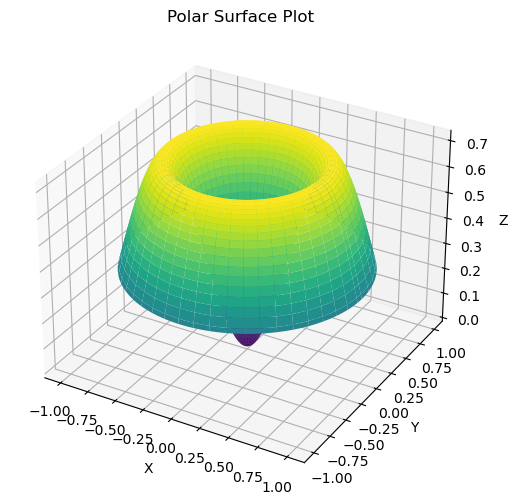

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
k = 1
c = 1
m = 40
n = 0

# Define the polar grid
r = np.linspace(0, 1, 100)  # Radius from 0 to 1
theta = np.linspace(0, 2 * np.pi, 100)  # Angle from 0 to 2π
R, T = np.meshgrid(r, theta)

# Convert polar to Cartesian coordinates
X = R * np.cos(T)
Y = R * np.sin(T)

# Compute function values
Z = oddcomputemultiprolatewithoutyk(R, k, c, m, n)

# Create surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Polar Surface Plot")

plt.show()

In [20]:
from scipy.special import gamma, binom

def evencliffordlegendreradialpart(r, N, k):
    if N == 0:
        C = 1
    else:
        prefactor = ((2**(2*N)) * gamma(2*N + 1)) / gamma(N + 1)
        C = prefactor * ((gamma(k + N + 1) / gamma(k + 1)))
        
        for i in range(1, N + 1):
            C += prefactor * (binom(N, i) * ((gamma(i + k + N + 1) / gamma(i + k + 1))) *
                              (-1)**i * (r**(2*i)))
    
    D = (np.sqrt(2*k + 4*N + 2) / (2**(2*N) * gamma(2*N+1))) * C
    return D


In [21]:
evencliffordlegendreradialpart(0.24, 2, 3)

33.366691839999994

In [22]:
from scipy.special import gamma, binom

def oddcliffordlegendreradialpart(r, N, k):
    if N==0:
        C=-2
    else:
        C=-((((2**((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*(gamma(k+N+2)/(gamma(k+2)))
        for i in range(1, N + 1):
            C=C-((((2**((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*((binom(N,i)*((gamma(i+k+N+2))/(gamma(i+k+2)))*((-1)**(i))*(r**(2*i))))
    D=(np.sqrt((2*k)+(4*N)+4)/(2**(2*N+1)*gamma(2*N+2)))*C
    return D

In [23]:
oddcliffordlegendreradialpart(0.24, 2, 3)

-53.76994373636101

In [24]:
def evencomputemultiprolateradialpart(r, k, c, m, n):
    G = 0.0
    N = evencoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * evencliffordlegendreradialpart(r, j, k)  
    return G

In [25]:
evencomputemultiprolateradialpart(0,1,2,20,0)

16.618177665670196

In [26]:
def oddcomputemultiprolateradialpart(r, k, c, m, n):
    G = 0.0
    N = oddcoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * oddcliffordlegendreradialpart(r, j, k)  
    return G

In [27]:
oddcomputemultiprolateradialpart(0.6, 1, 1, 20, 0)

4.98672830143931

In [28]:
import numpy as np
from scipy.special import gamma

def evenquatientFourieronprolateatzero(n, k, c, m):
    N = evencoefficientcliffordprolate(k, c, m, n)
    q = -1.0 * N[0] * np.sqrt(2 * k + 2) * (np.pi ** (k + 1)) * (c ** k) * (1j ** k) / (gamma(k + 2) * evencomputemultiprolateradialpart(0, k, c, m, n))
    return q

In [29]:
evenquatientFourieronprolateatzero(0,2,2,20)

(0.49999909906795525-0j)

In [30]:
import numpy as np
from scipy.special import gamma

def oddquatientFourieronprolateatzero(n, k, c, m):
    N = oddcoefficientcliffordprolate(k, c, m, n)  # Assuming this function is defined
    q = (N[0] * np.sqrt(2*k + 4) * np.pi**(k + 2) * c**(k + 1) * (1j)**(k + 1)) / (
        gamma(k + 3) * oddcomputemultiprolateradialpart(0, k, c, m, n)
    )
    return q


In [31]:
oddquatientFourieronprolateatzero(0,2,2,10)

0.49999042085762446j

In [32]:
import numpy as np
import matplotlib.pyplot as plt
def Plotting_Eigenvalues_CPSWFs(k,c,m,number_eigenvalues):
    T=[]
    for i in range(number_eigenvalues+1):
        T.append(abs(evenquatientFourieronprolateatzero(i, k, c, m)))
        T.append(abs(oddquatientFourieronprolateatzero(i, k, c, m)))
    return T

In [33]:
Plotting_Eigenvalues_CPSWFs(1,1,20,5)

[0.9952801568689383,
 0.9617425992063345,
 0.7174710520756238,
 0.40322208836860923,
 0.11829164263646093,
 0.03478792418391862,
 0.006435486474617359,
 0.0013734602853921797,
 0.00020034871518701512,
 3.383139373990412e-05,
 4.1237724622075464e-06,
 5.756343330939327e-07]

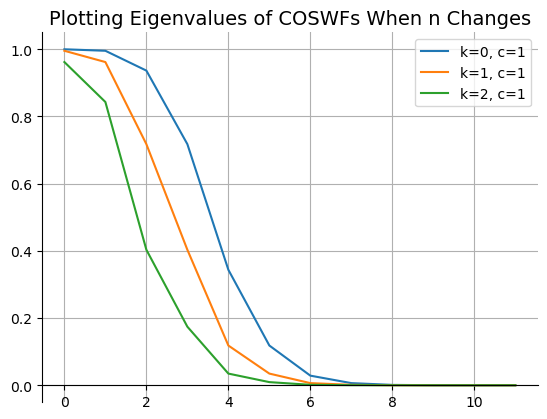

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot the data for different k values
plt.plot(Plotting_Eigenvalues_CPSWFs(0, 1, 40, 5), label="k=0, c=1")
plt.plot(Plotting_Eigenvalues_CPSWFs(1, 1, 40, 5), label="k=1, c=1")
plt.plot(Plotting_Eigenvalues_CPSWFs(2, 1, 40, 5), label="k=2, c=1")

# Add grid, legend, and display the plot
plt.title("Plotting Eigenvalues of COSWFs When n Changes", fontsize=14)
plt.grid()
plt.legend()
plt.show()


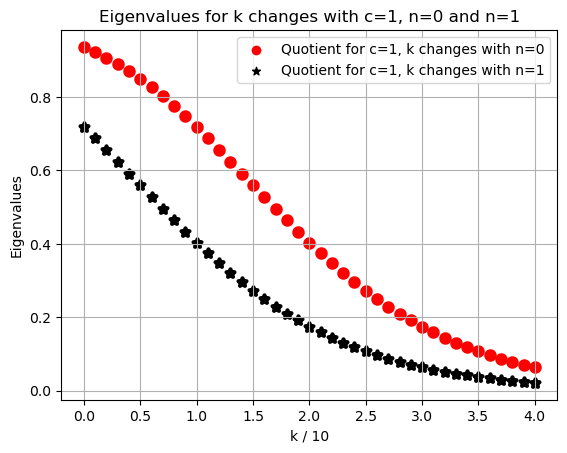

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function for plotting the eigenvalues
def plot_eigenvalues():
    # Initialize plot
    T = [0.0 for _ in range(41)]
    
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Loop over k values from 0 to 40
    for k in range(41):
        T[k] = abs(evenquatientFourieronprolateatzero(1, k/10, 1, 20))  # even quotient
        ax.scatter(k/10, T[k], color='red', marker='o', linewidths=3)  # Scatter plot for even quotient

        U = abs(oddquatientFourieronprolateatzero(1, k/10, 1, 20))  # odd quotient
        ax.scatter(k/10, U, color='black', marker='*', linewidths=3)  # Scatter plot for odd quotient
    
    # Final values for k/10
    M = abs(evenquatientFourieronprolateatzero(1, 40/10, 1, 20))
    N = abs(oddquatientFourieronprolateatzero(1, 40/10, 1, 20))

    # Scatter the final values with labels
    ax.scatter(40/10, M, color='red', marker='o', label="Quotient for c=1, k changes with n=0")
    ax.scatter(40/10, N, color='black', marker='*', label="Quotient for c=1, k changes with n=1")

    # Set title and labels
    ax.set_title('Eigenvalues for k changes with c=1, n=0 and n=1')
    ax.set_xlabel('k / 10')
    ax.set_ylabel('Eigenvalues')
    
    # Add legend
    ax.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_eigenvalues()


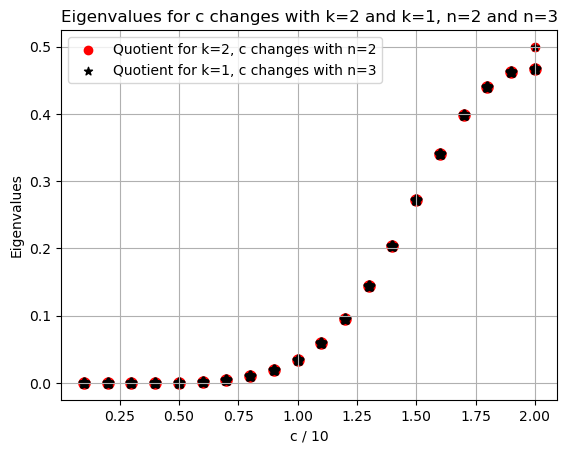

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Function for plotting the eigenvalues
def plot_eigenvalues():
    # Initialize plot
    fig, ax = plt.subplots()

    # Loop over c values from 1 to 20
    for c in range(1, 21):
        M = abs(evenquatientFourieronprolateatzero(2, 2, c/10, 20))  # even quotient
        N = abs(oddquatientFourieronprolateatzero(2, 1, c/10, 20))  # odd quotient

        # Plot even quotient with red circles
        ax.scatter(c/10, M, color='red', marker='o', linewidths=3)

        # Plot odd quotient with black stars
        ax.scatter(c/10, N, color='black', marker='*', linewidths=3)

    # Final values for c=20
    M_final = abs(evenquatientFourieronprolateatzero(1, 2, 20/10, 20))
    N_final = abs(oddquatientFourieronprolateatzero(1, 1, 20/10, 20))

    # Plot final values with labels
    ax.scatter(20/10, M_final, color='red', marker='o', label="Quotient for k=2, c changes with n=2")
    ax.scatter(20/10, N_final, color='black', marker='*', label="Quotient for k=1, c changes with n=3")

    # Set title and labels
    ax.set_title('Eigenvalues for c changes with k=2 and k=1, n=2 and n=3')
    ax.set_xlabel('c / 10')
    ax.set_ylabel('Eigenvalues')

    # Add legend
    ax.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_eigenvalues()
